<a href="https://colab.research.google.com/github/tkhan3/machinelearning/blob/master/outlier_detection_clustering_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
#import pandas as pd
!google-drive-ocamlfuse drive
!apt-get -qq install -y graphviz && pip install -q pydot
!pip3 install seaborn==0.9.0
import pydot
!mkdir -p drive
!google-drive-ocamlfuse drive

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 110851 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


KeyboardInterrupt: ignored

In [2]:
!pip install sklearn_pandas
!pip3 install seaborn==0.9.0
!pip install -e "git+https://github.com/perrygeo/jenks.git#egg=jenks"

In [2]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import itertools
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import IsolationForest

Using TensorFlow backend.


In [0]:
seed = np.random.RandomState(42)

In [0]:
import os
drive_path = 'drive/DL_COLAB/'

BASELINE_DATA_PATH = os.path.join(drive_path,"outlier_detection")

def load_hr_data(filename, file_path=BASELINE_DATA_PATH):
    csv_path = os.path.join(file_path, filename)
    return pd.read_csv(csv_path,sep=",")

In [5]:
baseline_data = load_hr_data("baseline_ds_val.csv")

FileNotFoundError: ignored

In [7]:
print (baseline_data.shape)
print (baseline_data.columns)

(1048494, 1)
Index(['baseline_ds'], dtype='object')


In [8]:
baseline_data.describe()

,baseline_ds
count,1.048494e+06
mean,7.320035e+04
std,3.424285e+04
min,9.240000e+02
25%,4.558800e+04
50%,6.764600e+04
75%,1.003200e+05
max,3.300000e+05


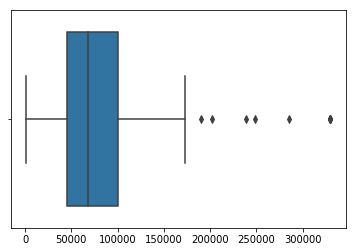

In [9]:
sns.boxplot(x=baseline_data)

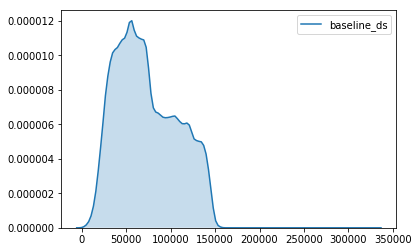

In [10]:
sns.kdeplot(baseline_data["baseline_ds"],shade=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a13887f98>]],
      dtype=object)

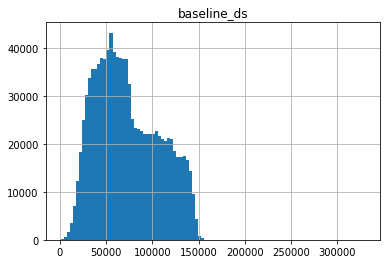

In [11]:
baseline_data.hist(bins=100)

In [0]:
Isolcation_clf = IsolationForest(max_samples=100, random_state=seed)

In [150]:
Isolcation_clf.fit(baseline_data)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination='legacy',
        max_features=1.0, max_samples=100, n_estimators=100, n_jobs=None,
        random_state=<mtrand.RandomState object at 0x7facb88a6900>,
        verbose=0)

In [151]:
y_pred = Isolcation_clf.predict(baseline_data)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [0]:
baseline_data["label"] = y_pred

In [153]:
baseline_data.describe()

,baseline_ds,label
count,1.048494e+06,1.048494e+06
mean,7.320035e+04,8.004891e-01
std,3.424285e+04,5.993476e-01
min,9.240000e+02,-1.000000e+00
25%,4.558800e+04,1.000000e+00
50%,6.764600e+04,1.000000e+00
75%,1.003200e+05,1.000000e+00
max,3.300000e+05,1.000000e+00


In [15]:
baseline_data.head()

,baseline_ds,label
0,111777,1
1,118534,1
2,124623,1
3,70656,1
4,117179,1


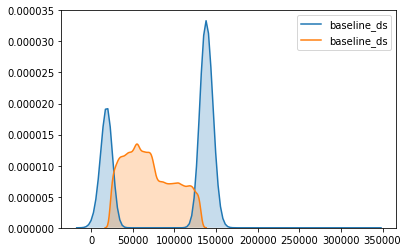

In [154]:
sns.kdeplot(baseline_data["baseline_ds"][baseline_data["label"] == -1],shade=True)
sns.kdeplot(baseline_data["baseline_ds"][baseline_data["label"] == 1],shade=True)

In [155]:
print (baseline_data.shape)

(1048494, 2)


***Fitting Univariate Kernel Desnity Estimation to identify the number of cluster***

In [0]:
from statsmodels.nonparametric.kde import KDEUnivariate

In [0]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
nobs = 300
np.random.seed(1234)
sample = np.random.normal(size=nobs)
dens = sm.nonparametric.KDEUnivariate(sample)

In [0]:
from numpy import array, linspace
from sklearn.neighbors.kde import KernelDensity
from matplotlib.pyplot import plot
from scipy.signal import argrelextrema

(10, 1)
Minima: [17.34693878 33.67346939]
Maxima: [10.20408163 21.42857143 44.89795918]
[10 11  9 11 11 12] [23 21 20] [45]


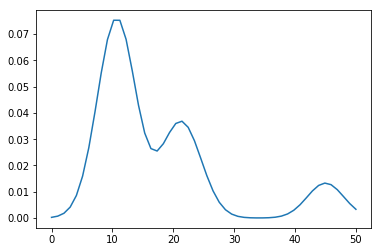

In [158]:
a = array([10,11,9,23,21,11,45,20,11,12]).reshape(-1, 1)
print (a.shape)
kde = KernelDensity(kernel='gaussian', bandwidth=3).fit(a)
s = linspace(0,50)
e = kde.score_samples(s.reshape(-1,1))
plot(s, np.exp(e))
mi, ma = argrelextrema(e, np.less)[0], argrelextrema(e, np.greater)[0]
mi, ma = argrelextrema(e, np.less)[0], argrelextrema(e, np.greater)[0]
print ("Minima:", s[mi])
print ("Maxima:", s[ma])
print (a[a < mi[0]], a[(a >= mi[0]) * (a <= mi[1])], a[a >= mi[1]])

In [159]:
mi, ma = argrelextrema(np.exp(e), np.less)[0], argrelextrema(e, np.greater)[0]
mi, ma = argrelextrema(np.exp(e), np.less)[0], argrelextrema(e, np.greater)[0]
print ("Minima:", s[mi])
print ("Maxima:", s[ma])
print (a[a < mi[0]], a[(a >= mi[0]) * (a <= mi[1])], a[a >= mi[1]])

Minima: [17.34693878 33.67346939]
Maxima: [10.20408163 21.42857143 44.89795918]
[10 11  9 11 11 12] [23 21 20] [45]


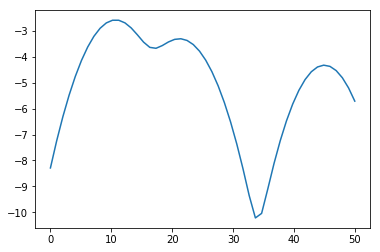

In [160]:
plot(s,e)

In [161]:
print (e)
print (s)

[ -8.28756807  -7.24777511  -6.31363719  -5.48443091  -4.75954899
  -4.1385332   -3.62109719  -3.20713315  -2.89669304  -2.68992285
  -2.58688854  -2.58711229  -2.68829672  -2.88281708  -3.14872399
  -3.43174589  -3.63372319  -3.66926533  -3.56560828  -3.42499474
  -3.32509123  -3.30141357  -3.36677345  -3.52528749  -3.77841902
  -4.12718753  -4.572866    -5.11710031  -5.76181301  -6.5090355
  -7.36061966  -8.31637244  -9.35263535 -10.21601484 -10.04157715
  -9.09452155  -8.11412556  -7.23605954  -6.47258679  -5.82471662
  -5.29253162  -4.87603854  -4.57523796  -4.3901299   -4.32071438
  -4.36699139  -4.52896094  -4.80662303  -5.19997765  -5.7090248 ]
[ 0.          1.02040816  2.04081633  3.06122449  4.08163265  5.10204082
  6.12244898  7.14285714  8.16326531  9.18367347 10.20408163 11.2244898
 12.24489796 13.26530612 14.28571429 15.30612245 16.32653061 17.34693878
 18.36734694 19.3877551  20.40816327 21.42857143 22.44897959 23.46938776
 24.48979592 25.51020408 26.53061224 27.55102041 

In [164]:
baseline_1d = baseline_data["baseline_ds"].reshape(-1,1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [163]:
baseline_data.describe()

,baseline_ds,label
count,1.048494e+06,1.048494e+06
mean,7.320035e+04,8.004891e-01
std,3.424285e+04,5.993476e-01
min,9.240000e+02,-1.000000e+00
25%,4.558800e+04,1.000000e+00
50%,6.764600e+04,1.000000e+00
75%,1.003200e+05,1.000000e+00
max,3.300000e+05,1.000000e+00


In [25]:
baseline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048494 entries, 0 to 1048493
Data columns (total 2 columns):
baseline_ds    1048494 non-null int64
label          1048494 non-null int64
dtypes: int64(2)
memory usage: 16.0 MB


In [166]:
baseline_1d = baseline_data["baseline_ds"].reshape(-1,1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [0]:
kde = KernelDensity(kernel='gaussian', bandwidth=5).fit(baseline_1d.reshape(-1,1))

In [0]:
s1 = linspace(0,330000,50)
print (s1.shape)
#e1 = kde.score_samples(s1.reshape(-1,1))
#e1 = kde.score_samples(baseline_1d)

In [134]:
print (e1)

[-1.70919112e+04 -1.48242014e+01 -1.35098397e+01 -1.26209305e+01
 -1.16303082e+01 -1.15440589e+01 -1.15155134e+01 -1.14328505e+01
 -1.13197223e+01 -1.15765796e+01 -1.15548067e+01 -1.14844375e+01
 -1.20258367e+01 -1.20118135e+01 -1.19097093e+01 -1.19250895e+01
 -1.20564688e+01 -1.20428498e+01 -1.20419291e+01 -1.22309038e+01
 -1.20579424e+01 -1.22652358e+01 -1.39938138e+01 -3.43516360e+01
 -1.99053110e+05 -9.77561304e+04 -7.31343929e+04 -1.49533681e+06
 -8.74261692e+04 -4.31373858e+05 -1.61516406e+02 -8.84336110e+05
 -3.58275477e+06 -5.55119639e+06 -1.97029094e+06 -2.03629544e+05
 -2.51212218e+05 -2.14687819e+04 -1.20758857e+06 -4.20795241e+06
 -4.97087533e+06 -1.63103343e+06 -1.05435592e+05 -3.94081822e+05
 -2.49697212e+06 -6.41410648e+06 -8.16411289e+06 -3.62850273e+06
 -9.07136632e+05 -1.45994824e+01]


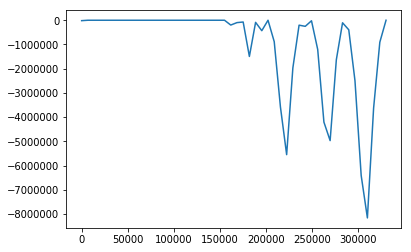

In [135]:
plot(s1, e1)

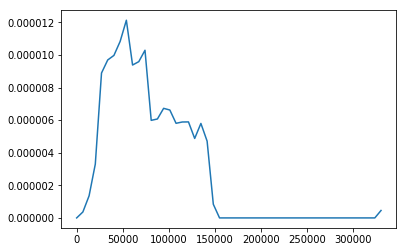

In [136]:
plot(s1, np.exp(e1))

In [0]:
mi, ma = argrelextrema(e1, np.less)[0], argrelextrema(e1, np.greater)[0]

In [138]:
print ("Minima:", s1[mi])
print ("Maxima:", s1[ma])

Minima: [ 60612.24489796  80816.32653061 107755.10204082 127959.18367347
 161632.65306122 181836.73469388 195306.12244898 222244.89795918
 242448.97959184 269387.75510204 309795.91836735]
Maxima: [ 53877.55102041  74081.63265306  94285.71428571 121224.48979592
 134693.87755102 175102.04081633 188571.42857143 202040.81632653
 235714.28571429 249183.67346939 282857.14285714]


In [0]:
mi, ma = argrelextrema(np.exp(e1), np.less)[0], argrelextrema(np.exp(e1), np.greater)[0]

In [124]:
print ("Minima:", s1[mi])
print ("Maxima:", s1[ma])

Minima: [ 60612.24489796  87551.02040816 107755.10204082 127959.18367347
 161632.65306122 181836.73469388 195306.12244898 222244.89795918
 242448.97959184 269387.75510204 309795.91836735]
Maxima: [ 53877.55102041  67346.93877551 101020.40816327 114489.79591837
 134693.87755102 175102.04081633 188571.42857143 202040.81632653
 235714.28571429 249183.67346939 282857.14285714]


In [33]:
baseline_1d.describe()

count    1.048494e+06
mean     7.320035e+04
std      3.424285e+04
min      9.240000e+02
25%      4.558800e+04
50%      6.764600e+04
75%      1.003200e+05
max      3.300000e+05
Name: baseline_ds, dtype: float64

In [0]:
baseline_1d[baseline_1d > 130000] = 130000

In [47]:
baseline_1d.describe()

count    1.048494e+06
mean     7.262705e+04
std      3.317417e+04
min      9.240000e+02
25%      4.558800e+04
50%      6.764600e+04
75%      1.003200e+05
max      1.300000e+05
Name: baseline_ds, dtype: float64

In [35]:
#print (baseline_1d_capped.shape)
print (baseline_1d.shape)

(1048494,)


In [40]:
kde = KernelDensity(kernel='gaussian', bandwidth=.1).fit(baseline_1d.reshape(-1,1))
s1 = linspace(0,130000,50)
print (s1.shape)
e1 = kde.score_samples(s1.reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


(50,)


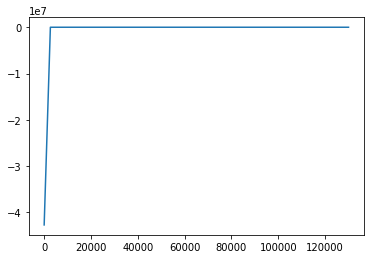

In [41]:
plot(s1, e1)

In [0]:
baseline_1d_trimmed = baseline_1d[baseline_1d < 70000]

In [43]:
kde = KernelDensity(kernel='gaussian', bandwidth=3).fit(baseline_1d_trimmed.reshape(-1,1))
s1 = linspace(0,70000,50)
print (s1.shape)
e1 = kde.score_samples(s1.reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


(50,)


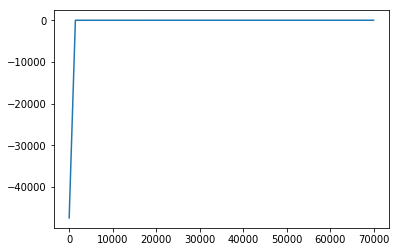

In [44]:
plot(s1, e1)

In [0]:
temp_range=[10]
x_grid = np.linspace(-1, 1, 1000)

In [0]:
###setup k-means clustering

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

In [0]:
def Km_clust(data,n_clu):
  km=KMeans(n_clusters=n_clu,random_state=123)
  km_tr=km.fit_transform(data)
  km_labels=km.fit_predict(data)
  km_lab=km.labels_
  centroids=km.cluster_centers_
  return km,km_labels#,km_tr,centroids,km_lab

In [0]:
def diff_Kmeans(feature_matrix,range_of_n,verbose=1):
    KM_dict={}
    for n_clusters in range_of_n:
        if verbose>0: print (datetime.now())
        if verbose>0: print ('Running for '+str(n_clusters)+' clusters...')
        KM_n=Km_clust(feature_matrix,n_clusters)
        KM_dict[n_clusters]=[KM_n[0],KM_n[1]]
        if verbose>0: print (datetime.now())
        sample_silhoutte_values=silhouette_samples(feature_matrix,KM_n[1])
        KM_dict[n_clusters]=[KM_n[0],KM_n[1],sample_silhoutte_values]
    return KM_dict

In [0]:
km=KMeans(n_clusters=3,random_state=123)
km_tr=km.fit_transform(baseline_1d_kmeans)
km_labels=km.fit_predict(baseline_1d_kmeans)

In [0]:
baseline_data["cluster_label"] = km_labels

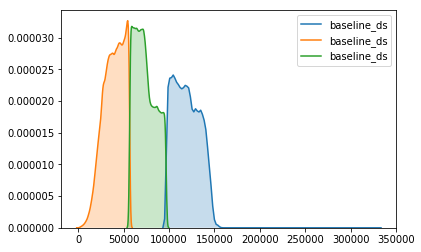

In [44]:
sns.kdeplot(baseline_data["baseline_ds"][baseline_data["cluster_label"] == 0],shade=True)
sns.kdeplot(baseline_data["baseline_ds"][baseline_data["cluster_label"] == 1],shade=True)
sns.kdeplot(baseline_data["baseline_ds"][baseline_data["cluster_label"] == 2],shade=True)

In [0]:
count_cluster_zero = baseline_data["baseline_ds"][baseline_data["cluster_label"] == 0].count()
count_cluster_one = baseline_data["baseline_ds"][baseline_data["cluster_label"] == 1].count()
count_cluster_two = baseline_data["baseline_ds"][baseline_data["cluster_label"] == 2].count()

In [49]:
print ('number of element in cluster zero %s' %count_cluster_zero)
print ('number of element in cluster one %s' %count_cluster_one)
print ('number of element in cluster two %s' %count_cluster_two)

number of element in cluster zero 285527
number of element in cluster one 395177
number of element in cluster two 367790


In [0]:
km=KMeans(n_clusters=4,random_state=123)
km_tr=km.fit_transform(baseline_1d_kmeans)
km_labels=km.fit_predict(baseline_1d_kmeans)

In [0]:
baseline_data["cluster_label_4"] = km_labels

In [0]:
centers = km.cluster_centers_

In [55]:
print (centers)

[[ 94417.69566871]
 [ 34380.68686969]
 [127083.98687265]
 [ 62872.23980775]]


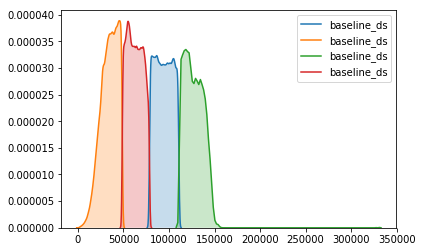

In [53]:
sns.kdeplot(baseline_data["baseline_ds"][baseline_data["cluster_label_4"] == 0],shade=True)
sns.kdeplot(baseline_data["baseline_ds"][baseline_data["cluster_label_4"] == 1],shade=True)
sns.kdeplot(baseline_data["baseline_ds"][baseline_data["cluster_label_4"] == 2],shade=True)
sns.kdeplot(baseline_data["baseline_ds"][baseline_data["cluster_label_4"] == 3],shade=True)

In [0]:
count_cluster_zero = baseline_data["baseline_ds"][baseline_data["cluster_label"] == 0].count()
count_cluster_one = baseline_data["baseline_ds"][baseline_data["cluster_label"] == 1].count()
count_cluster_two = baseline_data["baseline_ds"][baseline_data["cluster_label"] == 2].count()
count_cluster_three = baseline_data["baseline_ds"][baseline_data["cluster_label"] == 3].count()

In [43]:
baseline_data["cluster_label"].describe()

count    1.048494e+06
mean     1.078458e+00
std      7.854586e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.000000e+00
Name: cluster_label, dtype: float64

In [26]:
range_n_clusters=range(3,10)
baseline_1d_kmeans = baseline_data["baseline_ds"].reshape(-1,1)
KM_info=diff_Kmeans(baseline_1d_kmeans,range_n_clusters)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


2019-01-23 17:33:19.333628
Running for 3 clusters...
2019-01-23 17:33:36.949459


KeyboardInterrupt: ignored

In [0]:
range_n_clusters=range(5,10,5)

In [93]:
range_n_clusters

range(5, 10, 5)

Obtaining jenks from git+https://github.com/perrygeo/jenks.git#egg=jenks
  Cloning https://github.com/perrygeo/jenks.git to ./src/jenks
  Running setup.py develop for jenks


In [0]:
from jenks import jenks